In [1]:
from numpy import *
from matplotlib.pyplot import *

# For plotting. 
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

### Oppgave 1

In [2]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial. 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

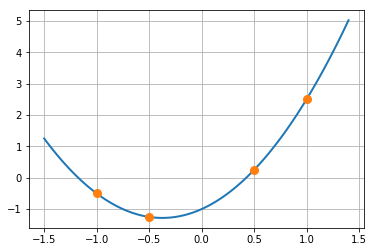

In [3]:
x_data = [-1, -1/2, 1/2, 1]
y_data = [-1/2, -5/4, 1/4, 5/2]

x = linspace(-1.5, 1.4, 101)

plot(x, 2*x**2 + (3/2)*x - 1)
plot(x_data, y_data, 'o');

#l = cardinal(x_data, x)
#p = lagrange(y_data, l)

#plot(x, p);

### Oppgave 2

Year = 2000	 Population = 4449960
Year = 2010	 Population = 4857131
Year = 2025	 Population = 4884810
Year = 2030	 Population = 3369091


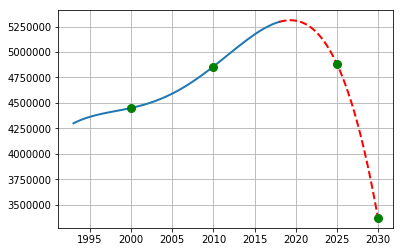

In [4]:
years = [1993, 1998, 203, 2008, 2013, 2018]
population = [4299167, 4417599, 4552252, 4737171, 5051275, 5295619]

# Interpolation 
x1 = linspace(1993, 2018, 101)
l1 = cardinal(years, x1)
p1 = lagrange(population, l1)

# Extrapolation
x2 = linspace(2018, 2030, 101)
l2 = cardinal(years, x2)
p2 = lagrange(population, l2)

# Test points
x3 = array([2000, 2010, 2025, 2030])
l3 = cardinal(years, x3)
p3 = lagrange(population, l3)

points = list(zip(x3, p3))

# Print plots
plot(x1, p1)
plot(x2, p2, 'r--')
plot(x3, p3, 'og')

# Print points
for point in points:
    print('Year = {:.0f}\t Population = {:.0f}'.format(*point));

#### Kommentar
Som vi ser, vil polynominterpolasjonen gi uønskede resultater utenfor interpolasjonsdomenet. Interpolasjon er egnet til approksimasjon av funksjoner innenfor interpolasjonsdomenet, ikke utenfor (såkalt ekstrapolasjon).

### Oppgave 3

In [1]:
x_data = [-1, 0, 1, 2]
y_data = [0.54, 0, 0.54, -1.66]
x = linspace(-1, 2, 101)

def f(x):
    return [x**2 * cos(x) for x in x]
def g(x):
    return -0.64*x**3 + 0.54*x**2 + 0.64*x
def h(x):
    return -0.66*x**3 + 0.625*x**2 + 0.56*x + 0.0432

# Print interpolation error
print("Max error for equidistant nodes is {:.2e}".format(max(abs(f(x)-g(x)))))
print("Max error for chebyshev nodes is {:.2e}".format(max(abs(f(x)-h(x)))))

# Plot functions and interpolation points
subplot(2, 1, 1)
plot(x, f(x), '#1B5E20')
plot(x, g(x))
plot(x, h(x))
plot(x_data, y_data, 'o', color="#212121")
legend(['Exact','Equidistant','Chebyshev'])

# Plot interpolation error
subplot(2, 1, 2)
plot(x, f(x) - g(x))
plot(x, f(x) - h(x))
legend(['Equidistant','Chebyshev']);

NameError: name 'linspace' is not defined